## Exploratory Data Analysis(Zillow Dataframe)
### Corey Solitaire
#### 10.13. 2020

In [1]:
import acquire
import prepare
import wrangle_zillow
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:20,.2f}'.format


import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
train, validate, test = wrangle_zillow.wrangle_zillow(wrangle_zillow.get_zillow_data(cached=False)) 

In [3]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,heatingorsystemdesc,propertylandusedesc,county
11612,11600673,3.00,3.00,7.00,"1,945.00","1,945.00",3.00,"34,047,894.00","-118,376,073.00","6,322.00",...,"784,417.00","2,016.00","548,032.00","9,564.10","60,372,170,023,000.00",0.00,2017-02-23,Floor/Wall,Single Family Residential,Los Angeles
8246,13069625,3.00,4.00,8.00,"2,484.00","2,484.00",3.00,"34,034,760.00","-117,827,592.00","9,595.00",...,"575,097.00","2,016.00","254,536.00","6,942.29","60,374,034,031,009.00",-0.04,2017-02-07,Central,Single Family Residential,Los Angeles
30920,17072012,4.50,4.00,8.00,"3,436.00","3,436.00",4.00,"34,281,197.00","-119,228,656.00","9,767.00",...,"560,991.00","2,016.00","197,991.00","5,943.90","60,371,371,031,000.00",-0.03,2017-04-28,None,Single Family Residential,Ventura
3593,10767620,3.00,3.00,8.00,"1,972.00","1,972.00",3.00,"34,212,494.00","-118,570,382.00","5,373.00",...,"246,702.00","2,016.00","107,778.00","3,164.96","60,371,341,042,004.00",0.00,2017-01-18,Central,Single Family Residential,Los Angeles
50544,11186544,3.00,4.00,7.00,"2,363.00","2,363.00",3.00,"34,622,804.00","-118,200,741.00","6,007.00",...,"105,757.00","2,016.00","16,542.00","2,598.21","60,379,102,101,005.00",-0.03,2017-06-27,Central,Single Family Residential,Los Angeles


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43320 entries, 11612 to 22735
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      43320 non-null  int64  
 1   bathroomcnt                   43320 non-null  float64
 2   bedroomcnt                    43320 non-null  float64
 3   buildingqualitytypeid         43320 non-null  float64
 4   calculatedfinishedsquarefeet  43320 non-null  float64
 5   finishedsquarefeet12          43320 non-null  float64
 6   fullbathcnt                   43320 non-null  float64
 7   latitude                      43320 non-null  float64
 8   longitude                     43320 non-null  float64
 9   lotsizesquarefeet             43320 non-null  float64
 10  propertycountylandusecode     43320 non-null  object 
 11  rawcensustractandblock        43320 non-null  float64
 12  regionidcity                  43320 non-null  float64
 1

In [5]:
train.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fullbathcnt',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'tdate', 'heatingorsystemdesc', 'propertylandusedesc', 'county'],
      dtype='object')

In [6]:
# Rename some colums for clarity
train.columns = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'squarefeet', 'delete_finishedsquarefeet12', 'delete_fullbathcnt',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'landusecode', 'rawcensustractandblock', 'city',
       'delete_proertycounty', 'zip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'tdate', 'heatingorsystemdesc', 'propertylandusedesc', 'county']

In [7]:
# Turn yearbuilt in to int
train["yearbuilt"] = train["yearbuilt"].astype('int')

In [8]:
# Turn squarefeet in to int
train["squarefeet"] = train["squarefeet"].astype('int')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43320 entries, 11612 to 22735
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   parcelid                     43320 non-null  int64  
 1   bathroomcnt                  43320 non-null  float64
 2   bedroomcnt                   43320 non-null  float64
 3   buildingqualitytypeid        43320 non-null  float64
 4   squarefeet                   43320 non-null  int64  
 5   delete_finishedsquarefeet12  43320 non-null  float64
 6   delete_fullbathcnt           43320 non-null  float64
 7   latitude                     43320 non-null  float64
 8   longitude                    43320 non-null  float64
 9   lotsizesquarefeet            43320 non-null  float64
 10  landusecode                  43320 non-null  object 
 11  rawcensustractandblock       43320 non-null  float64
 12  city                         43320 non-null  float64
 13  delete_proer

## Zillow Dataset

### Create a python script or jupyter notebook named explore_zillow and do the following:

    - Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

    - Answer those questions through a mix of statistical tests and visualizations.
______________________________________________________

**Questions**

Target(y) = logerror

1. What is the distribution of each of the variables?
2. Is logerror significantly different for properties in La County vs. Orange County vs. Ventura County?
3. In Orange county, does logerror vary by bedroomcnt?
4. In Orange county, does logerror vary across yearbuilt?
5. In Orange county, is there a relationship between squarefeet and logerror?

***

# 1. What is the distribution of each of the variables?   



- Graph the distribution of the variables we are intereted in

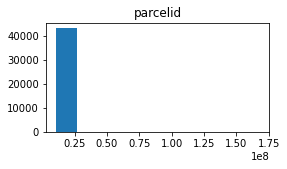

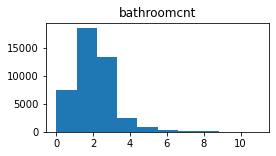

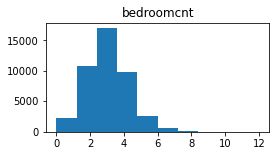

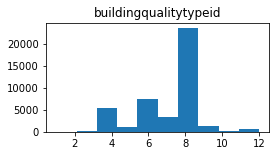

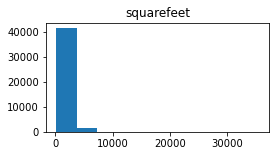

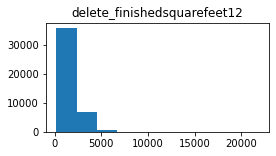

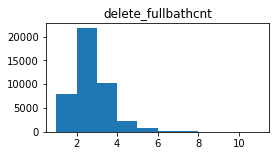

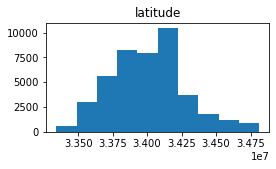

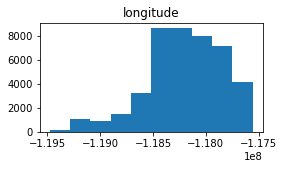

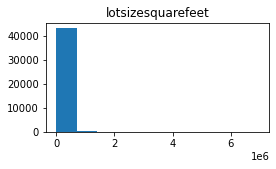

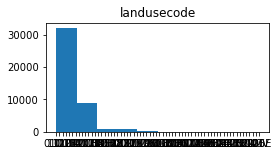

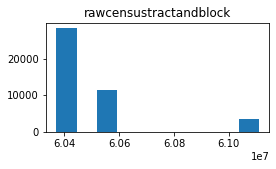

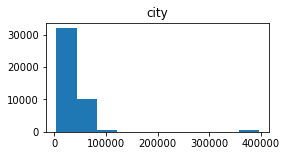

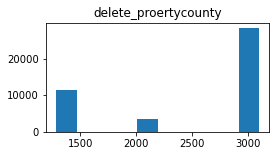

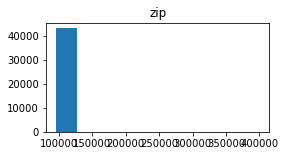

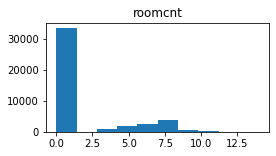

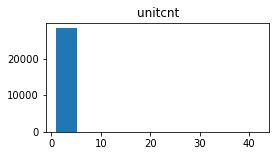

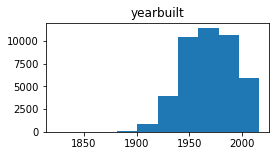

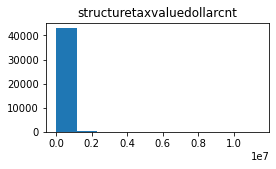

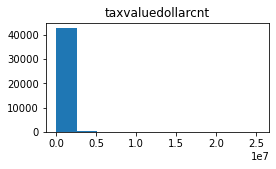

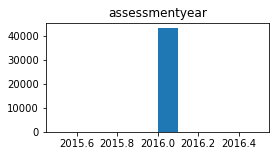

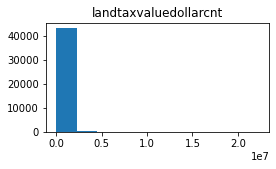

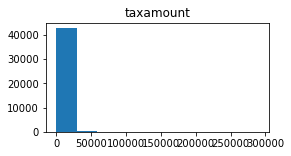

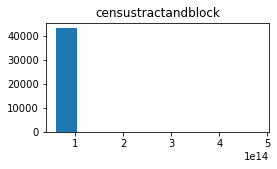

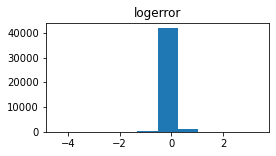

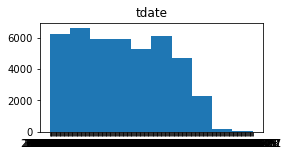

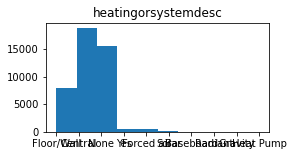

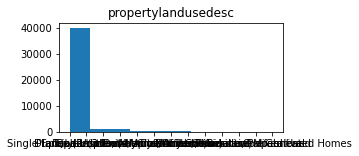

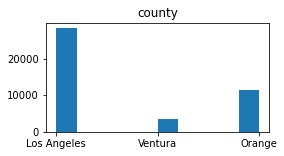

In [10]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

**Conclusion**

Independent Variables:
- Bin squarefeet to get a better view of distribution
- bedroomcnt is pretty evenly distribution
- yearbuilt has a pretty even distribution
- county is not even in number of observations, need to seperate data by county for further exploration

Dependent Variable (Target):
- Normal distribution

#### Break down by county

In [11]:
# LA County
la_df = train[train.county=='Los Angeles']
la_df.shape

(28328, 29)

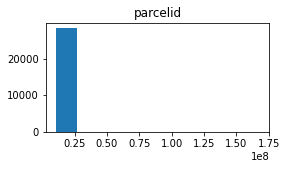

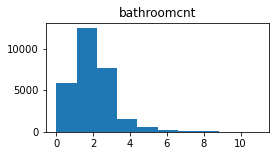

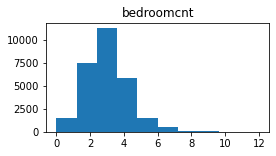

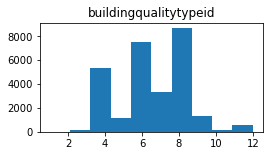

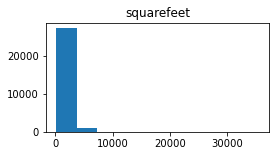

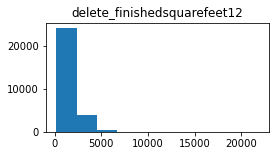

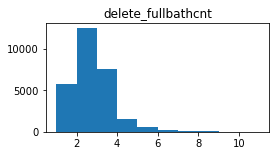

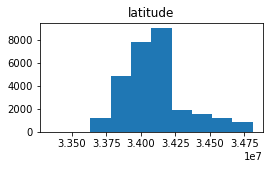

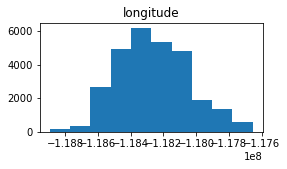

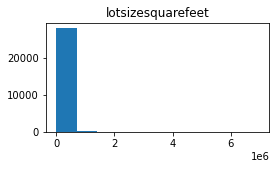

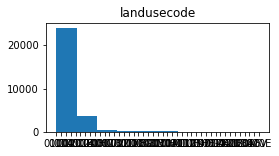

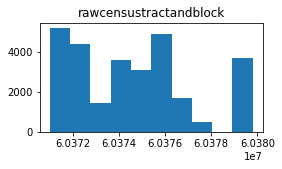

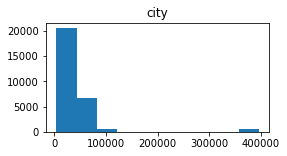

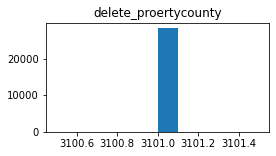

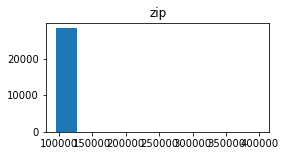

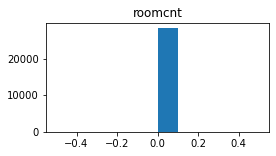

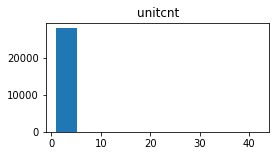

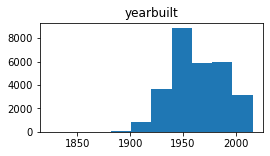

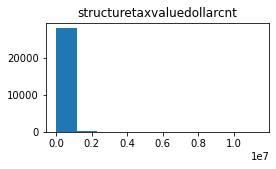

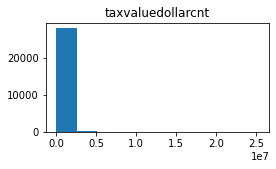

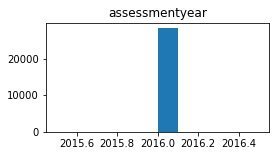

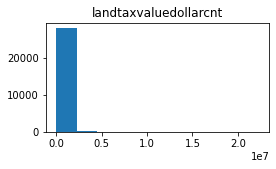

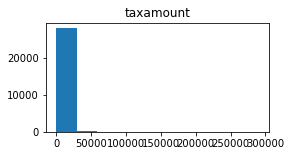

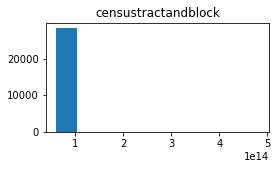

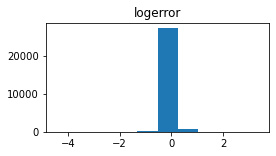

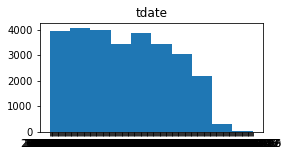

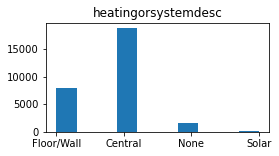

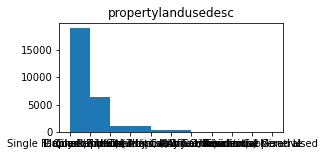

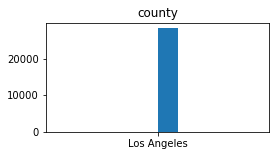

In [12]:
# Visualize LA County
for col in la_df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(la_df[col])
    plt.title(col)
    plt.show()

**Conclusion**

Independent Variables:
- squarefeet is sknewed to the right
- bedroomcnt is pretty evenly distribution
- yearbuilt has a pretty even distribution

Dependent Variable(Target):
- Even distribution

***

In [13]:
# Ventura County
va_df = train[train.county=='Ventura']
va_df.shape

(3489, 29)

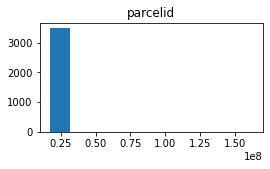

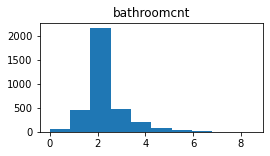

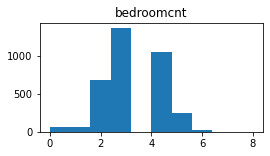

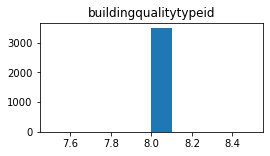

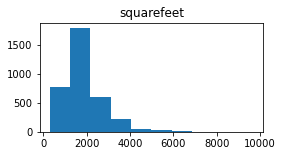

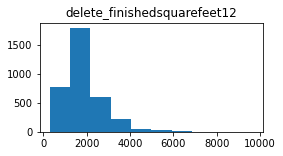

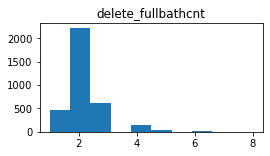

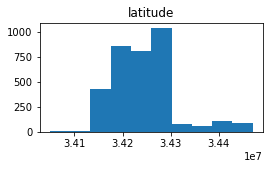

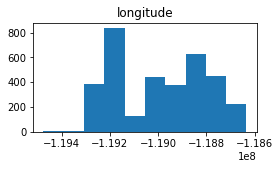

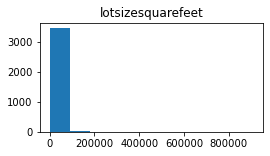

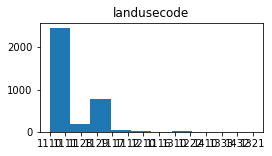

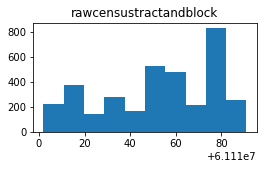

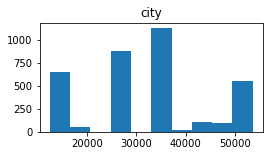

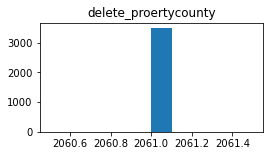

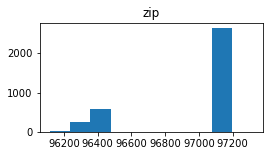

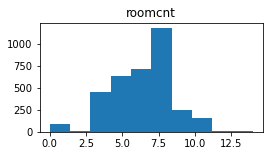

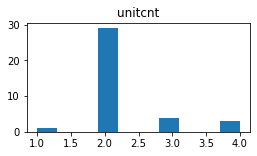

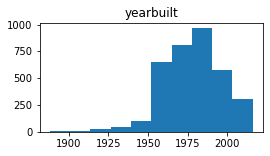

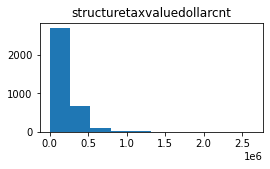

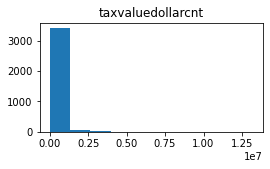

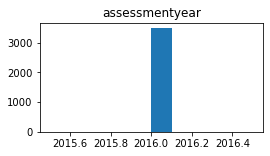

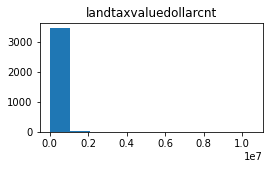

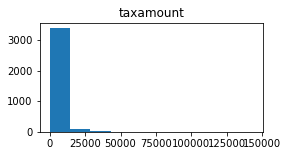

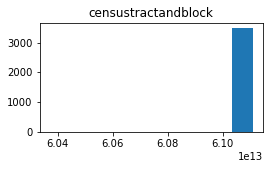

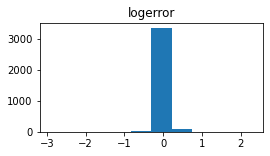

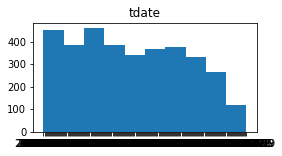

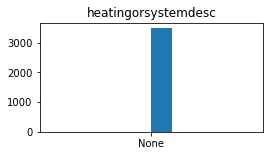

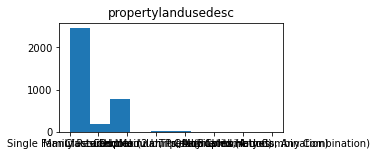

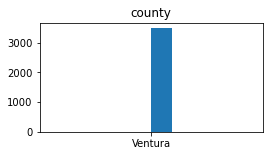

In [14]:
# Visualize Ventura County
for col in va_df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(va_df[col])
    plt.title(col)
    plt.show()

**Conclusion**

Independent Variables:
- squarefeet is pretty evenly distributed
- bedroomcnt is skewed to the right
- yearbuilt is skewed to the left

Dependent Variable(Target):
- Even Distribution

***

In [15]:
# Orange County
or_df = train[train.county=='Orange']
or_df.shape

(11503, 29)

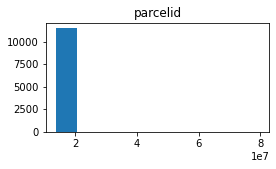

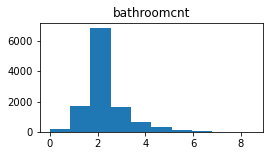

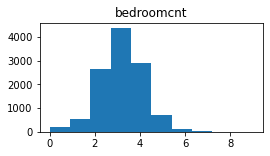

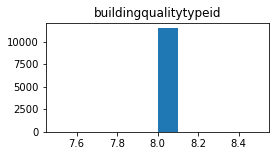

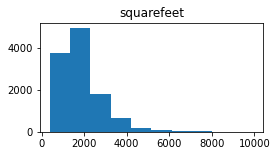

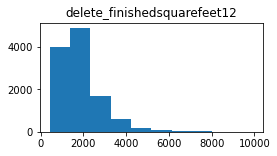

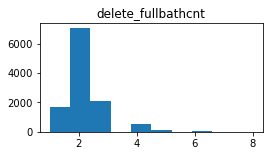

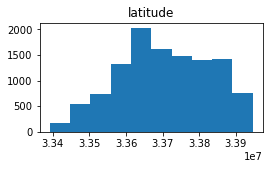

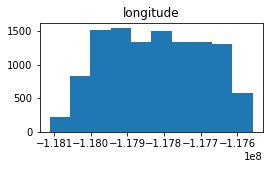

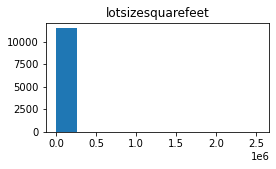

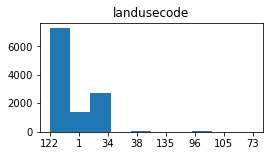

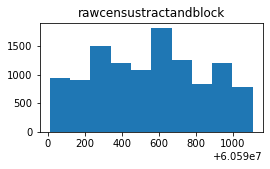

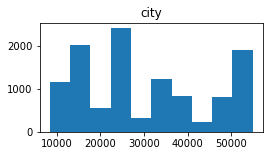

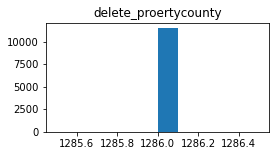

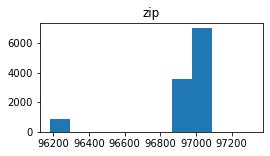

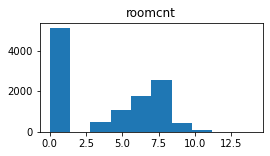

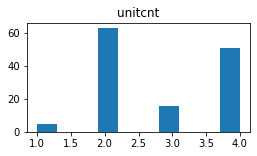

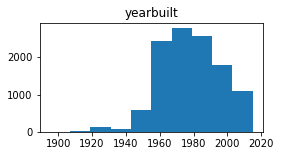

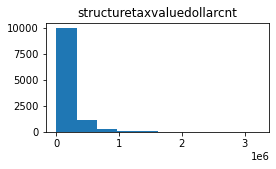

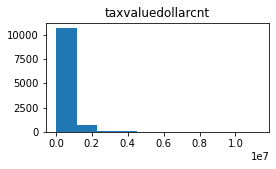

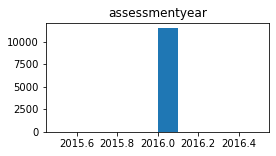

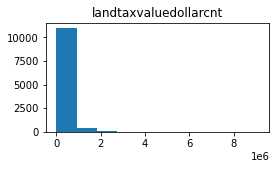

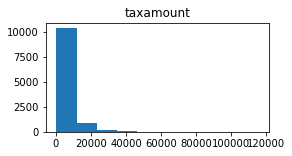

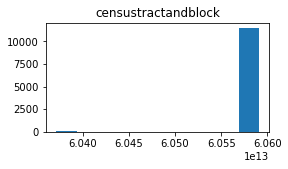

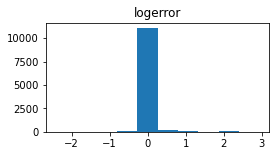

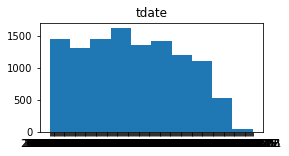

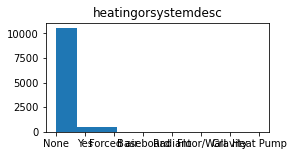

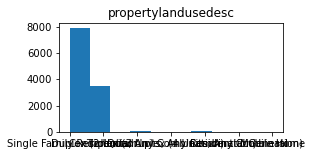

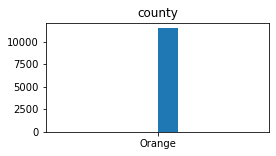

In [16]:
# Visualize Orange County
for col in or_df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(or_df[col])
    plt.title(col)
    plt.show()

**Conclusion**

Independent Variables:
- squarefeet is sknewed to the right
- bedroomcnt is pretty evenly distribution
- yearbuilt has a pretty even distribution

Dependent Variable(Target):
- even distribution
***

### Overall Conclusion
- bedroomcnt tends to be evenly distributed across all counties
- Sorting by county is best way to understand data
- Logerror is evenly distributed across all counties, so no county is really skewing results

***

# 2. Is logerror significantly different for properties in La County vs. Orange County vs. Ventura County?

- plot county vs logerror  
- ANOVA to test significance between variables  


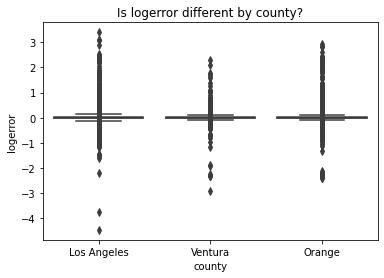

In [17]:
sns.boxplot(train.county, train.logerror)
plt.title("Is logerror different by county?")
plt.show()

The error does not appear to be different between counties, however I will preform an ANOVA to test this hypothesis

#### ANNOVA:

Hypothesis - This is no difference in logerror between observed counties

null_hypothesis = "Average logerror is the same across all counties"   
alternative_hypothesis = "Average logerror is different whithin different counties"   
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [18]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(la_df.logerror, va_df.logerror, or_df.logerror)
p

2.7101539152166186e-06

***Takwaay:***
Even though it appeared that there was no difference in logerror per county with a p-value < 0.01 we must **REJECT** the null and infer with 99% accuracy that there is a difference in logerror inside the counties

In [19]:
# Check to make sure ANNOVA is Correct
mean_la = la_df.logerror.mean()
mean_va = va_df.logerror.mean()
mean_or = or_df.logerror.mean()
print(f'The mean logerror for LA County is: {mean_la}')
print(f'The mean logerror for Ventura County is: {mean_va}')
print(f'The mean logerror for Orange County is: {mean_or}')

The mean logerror for LA County is: 0.01392515183355143
The mean logerror for Ventura County is: 0.014760379093435083
The mean logerror for Orange County is: 0.02347452985444019


*** While The ANNOVA informed me that there was a difference, i need to do a T-test between LA and Ventura county to see if they logerror is signficant between them***


***

#### 2 Sample T-Test:

Hypothesis - This is no difference in logerror between LA and Ventura Counties

null_hypothesis = "Average logerror is the same across counties"   
alternative_hypothesis = "Average logerror is different whithin counties"   
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [20]:
# test the equal variance 
# H0 is that the variances are equal
# Levene test (Reject Null if < 0.05)

stats.levene(la_df.logerror, va_df.logerror)

LeveneResult(statistic=17.432827625817932, pvalue=2.9843247460258592e-05)

P less than 0.05, Reject Null: Variance between dataframes is ***not*** equal

In [21]:
# equal_var = False as result of levene test

stats.ttest_ind(la_df.logerror, va_df.logerror,equal_var=False)

Ttest_indResult(statistic=-0.2800391468395894, pvalue=0.7794609572573431)

p-value greather than 0.05, Fail to Reject Null: The average log error is the same between the two counties

#### Final Takeaway
- Significant difference in logerror between counties, **but** only between Orange and the other two (LA and Ventura)   
- No Signficant difference in logerror between LA County and Ventura County

***

# 3. In Orange county, does logerror vary by bedroomcnt?

***Things are different in Orange County, lets see why***

- Visualize Data
- ANOVA
- 2 Sample T if Necessary

#### Orange County

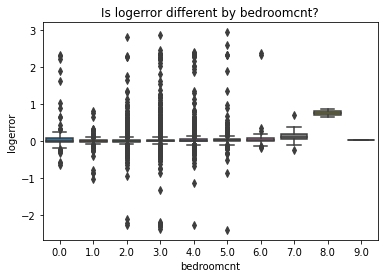

In [22]:
sns.boxplot(or_df.bedroomcnt, or_df.logerror)
plt.title("Is logerror different by bedroomcnt?")
plt.show()

Too messy, need to bin or modify categorical variable

In [23]:
or_df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,squarefeet,delete_finishedsquarefeet12,delete_fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
count,"11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00",...,"11,503.00",135.00,"11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00"
mean,"14,343,837.19",2.34,3.04,8.00,"1,870.47","1,860.24",2.17,"33,704,738.92","-117,821,918.23","7,565.35",...,3.62,2.84,"1,978.11","188,784.05","541,468.50","2,016.00","352,731.87","6,276.11","60,589,701,803,151.79",0.02
std,"669,440.73",0.90,1.09,0.00,949.81,936.05,0.81,"124,543.47","132,506.81","24,599.45",...,3.41,0.99,17.87,"206,184.16","559,333.59",0.00,"418,143.39","6,255.63","13,834,456,693.97",0.20
min,"13,834,526.00",0.00,0.00,8.00,384.00,436.00,1.00,"33,392,330.00","-118,111,451.00",480.00,...,0.00,1.00,"1,895.00",844.00,"13,817.00","2,016.00","1,627.00",150.16,"60,371,371,031,000.00",-2.41
25%,"14,104,923.50",2.00,2.00,8.00,"1,232.00","1,240.00",2.00,"33,616,373.00","-117,932,995.50","5,615.50",...,0.00,2.00,"1,965.00","79,387.00","256,249.00","2,016.00","137,157.00","2,971.82","60,590,320,511,000.00",-0.02
50%,"14,348,824.00",2.00,3.00,8.00,"1,626.00","1,605.00",2.00,"33,699,621.00","-117,823,765.00","7,205.00",...,5.00,2.00,"1,977.00","127,961.00","421,000.00","2,016.00","270,096.00","4,850.14","60,590,626,102,096.00",0.01
75%,"14,622,018.50",2.50,4.00,8.00,"2,261.00","2,233.00",2.00,"33,804,643.50","-117,710,383.00","7,237.00",...,7.00,4.00,"1,991.00","219,253.50","645,428.50","2,016.00","441,011.50","7,493.71","60,590,762,024,011.50",0.04
max,"79,640,490.00",8.50,9.00,8.00,"9,923.00","9,923.00",8.00,"33,945,897.00","-117,557,472.00","2,539,984.00",...,14.00,4.00,"2,015.00","3,229,501.00","11,317,682.00","2,016.00","9,138,678.00","115,923.26","60,591,106,073,013.00",2.93


Orange County Bedroom Cnt   
min = 0    
25% = 2   
50% = 3   
75% = 4   
Max = 9   

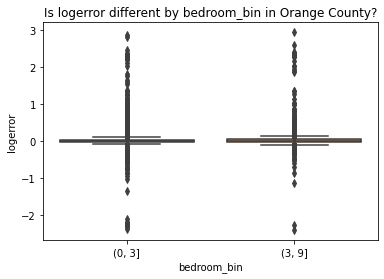

In [24]:
# Make a new column with bins for better visulization and testing (min, meadian, max)

or_df['bedroom_bin'] = pd.cut(or_df.bedroomcnt, [0, 3, 9])
sns.boxplot(or_df.bedroom_bin, or_df.logerror)
plt.title("Is logerror different by bedroom_bin in Orange County?")
plt.show()

It does not appear that there is a difference in logetter in binned bedrooms in LA county but we will preform a 2 sample T-test to verify

#### 2 Sample T-Test:

Hypothesis - This is no difference in logerror between bins (homes <= 3 bedrooms, homes > 3 bedrooms) in Orange County

null_hypothesis = "Average logerror is the same across bins"   
alternative_hypothesis = "Average logerror is different between bins"   
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [25]:
or_df.head(1)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,squarefeet,delete_finishedsquarefeet12,delete_fullbathcnt,latitude,longitude,lotsizesquarefeet,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,heatingorsystemdesc,propertylandusedesc,county,bedroom_bin
65563,14014097,2.50,4.00,8.00,2413,"2,413.00",2.00,"33,830,143.00","-118,015,726.00","4,845.00",...,"2,016.00","294,485.00","6,758.58","60,591,102,021,012.00",-0.01,2017-08-11,None,Single Family Residential,Orange,"(3, 9]"


In [26]:
or_df.bedroom_bin.value_counts()

(0, 3]    7574
(3, 9]    3744
Name: bedroom_bin, dtype: int64

In [27]:
# Create categories for T-Test
low_bin = or_df[or_df.bedroomcnt <= 3]
high_bin = or_df[or_df.bedroomcnt > 3]
low_bin.shape, high_bin.shape

((7759, 30), (3744, 30))

In [28]:
# test the equal variance 
# H0 is that the variances are equal
# Levene test (Reject Null if < 0.05)

stats.levene(low_bin.logerror, high_bin.logerror)

LeveneResult(statistic=2.012707929211271, pvalue=0.15601377571060562)

We fail to reject the null: Acept the variance between the two columns is equal

In [29]:
# equal_var = True as result of levene test

stats.ttest_ind(la_df.logerror, va_df.logerror,equal_var=True)

Ttest_indResult(statistic=-0.29215587687086103, pvalue=0.7701693507319033)

We fail to reject the null, ave logerror is the same across bedroom bins in Orange County

#### Final Takeaway
- No significant difference in logerror between binned bedroom counts, logerror must come from another feature

***

# 4. In Orange county, does logerror vary across yearbuilt?

***Maybe logerror difference can be explained by examining yearbuilt***

-Visualize Data   
-ANNOVA or T-Test depending on Binned Data

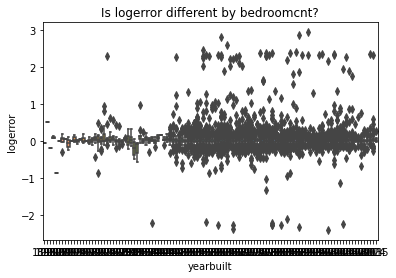

In [30]:
sns.boxplot(or_df.yearbuilt, or_df.logerror)
plt.title("Is logerror different by bedroomcnt?")
plt.show()

Too busy, need to bin yearbuilt

In [31]:
or_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11503 entries, 65563 to 53478
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   parcelid                     11503 non-null  int64   
 1   bathroomcnt                  11503 non-null  float64 
 2   bedroomcnt                   11503 non-null  float64 
 3   buildingqualitytypeid        11503 non-null  float64 
 4   squarefeet                   11503 non-null  int64   
 5   delete_finishedsquarefeet12  11503 non-null  float64 
 6   delete_fullbathcnt           11503 non-null  float64 
 7   latitude                     11503 non-null  float64 
 8   longitude                    11503 non-null  float64 
 9   lotsizesquarefeet            11503 non-null  float64 
 10  landusecode                  11503 non-null  object  
 11  rawcensustractandblock       11503 non-null  float64 
 12  city                         11503 non-null  float64 
 1

In [32]:
# Lets see the distribution
pd.set_option('display.max_rows', None)
(or_df['yearbuilt']).sort_values(ascending = True)

75295    1895
20848    1901
32841    1902
8688     1906
29928    1906
8287     1906
5833     1908
16231    1909
47910    1910
25016    1910
37350    1910
3716     1910
54213    1911
71635    1912
17645    1912
69919    1912
13212    1913
14736    1914
24597    1914
39534    1914
24692    1915
10115    1915
33220    1915
58431    1915
36663    1916
70508    1916
32363    1917
74453    1917
68867    1917
29352    1917
45122    1917
740      1917
72645    1917
42572    1918
45521    1919
52639    1919
40724    1919
1542     1920
58138    1920
70496    1920
70321    1920
37551    1920
2746     1920
49433    1920
28539    1920
24846    1921
9921     1921
72227    1921
5484     1921
56993    1921
26822    1921
12727    1921
19515    1921
130      1922
42798    1922
16396    1922
47211    1922
45255    1922
11663    1922
22199    1922
4736     1922
68473    1922
42072    1922
37349    1922
6355     1922
7244     1922
65022    1923
29324    1923
74085    1923
13827    1923
8039     1923
24374 

Earlest: 1895   
Most recent: 2015   
    
I think I will try 20 year bins and go from there

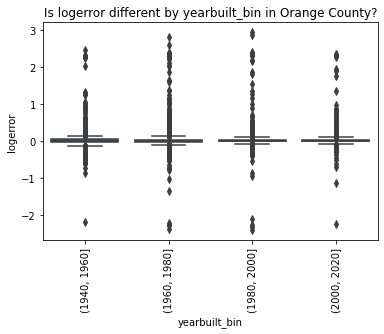

In [33]:
# Make a new column with bins for better visulization and testing (min, meadian, max)

or_df['yearbuilt_bin'] = pd.cut(or_df.yearbuilt, [1940, 1960, 1980, 2000, 2020])
sns.boxplot(or_df.yearbuilt_bin, or_df.logerror)
plt.title("Is logerror different by yearbuilt_bin in Orange County?")
plt.xticks(rotation=90)
plt.show()

There does not appear to be a difference between log error and year_built bins, but we will test this assertion with an ANNOVA

#### ANNOVA:

Hypothesis - This is no difference in logerror between binned data

null_hypothesis = "Average logerror is the same across all bins"   
alternative_hypothesis = "Average logerror is different whithin different bins"   
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [34]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

bin1 = or_df[or_df.yearbuilt <= 1940]
bin2 = or_df[(or_df.yearbuilt <= 1960) & (or_df.yearbuilt > 1940)]
bin3 = or_df[(or_df.yearbuilt <= 1980) & (or_df.yearbuilt > 1960)]
bin4 = or_df[(or_df.yearbuilt <= 2000) & (or_df.yearbuilt > 1980)]
bin5 = or_df[(or_df.yearbuilt <= 2020) & (or_df.yearbuilt > 2000)]


f, p = f_oneway(bin1.logerror, bin2.logerror, bin3.logerror, bin4.logerror, bin5.logerror)
p

0.16153778152758222

***

**Takeaway**

p-value is greater then alpha, Fail to Reject Null : Log error is is the same across all bins

***

# 5. In Orange County is there a relationship between squarefeet and logerror?

- Scatter plot
- Pearsons R or Spearmans depending on distribution

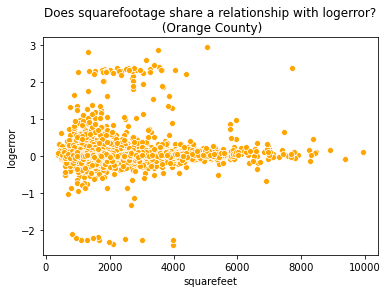

In [35]:
# Visualize Data

sns.scatterplot(x='squarefeet', y='logerror',
               data= or_df, color='orange')
plt.title("Does squarefootage share a relationship with logerror?\n (Orange County)")
plt.show()

There appears to be a relationship between the two variables, but I think i need to bind squared feet to better visualize what is going on

In [36]:
# Examine Distrubution
or_df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,squarefeet,delete_finishedsquarefeet12,delete_fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
count,"11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00",...,"11,503.00",135.00,"11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00","11,503.00"
mean,"14,343,837.19",2.34,3.04,8.00,"1,870.47","1,860.24",2.17,"33,704,738.92","-117,821,918.23","7,565.35",...,3.62,2.84,"1,978.11","188,784.05","541,468.50","2,016.00","352,731.87","6,276.11","60,589,701,803,151.79",0.02
std,"669,440.73",0.90,1.09,0.00,949.81,936.05,0.81,"124,543.47","132,506.81","24,599.45",...,3.41,0.99,17.87,"206,184.16","559,333.59",0.00,"418,143.39","6,255.63","13,834,456,693.97",0.20
min,"13,834,526.00",0.00,0.00,8.00,384.00,436.00,1.00,"33,392,330.00","-118,111,451.00",480.00,...,0.00,1.00,"1,895.00",844.00,"13,817.00","2,016.00","1,627.00",150.16,"60,371,371,031,000.00",-2.41
25%,"14,104,923.50",2.00,2.00,8.00,"1,232.00","1,240.00",2.00,"33,616,373.00","-117,932,995.50","5,615.50",...,0.00,2.00,"1,965.00","79,387.00","256,249.00","2,016.00","137,157.00","2,971.82","60,590,320,511,000.00",-0.02
50%,"14,348,824.00",2.00,3.00,8.00,"1,626.00","1,605.00",2.00,"33,699,621.00","-117,823,765.00","7,205.00",...,5.00,2.00,"1,977.00","127,961.00","421,000.00","2,016.00","270,096.00","4,850.14","60,590,626,102,096.00",0.01
75%,"14,622,018.50",2.50,4.00,8.00,"2,261.00","2,233.00",2.00,"33,804,643.50","-117,710,383.00","7,237.00",...,7.00,4.00,"1,991.00","219,253.50","645,428.50","2,016.00","441,011.50","7,493.71","60,590,762,024,011.50",0.04
max,"79,640,490.00",8.50,9.00,8.00,"9,923.00","9,923.00",8.00,"33,945,897.00","-117,557,472.00","2,539,984.00",...,14.00,4.00,"2,015.00","3,229,501.00","11,317,682.00","2,016.00","9,138,678.00","115,923.26","60,591,106,073,013.00",2.93


Bins for Square feet
min - 384   
25% - 1232   
50% - 1626   
75% - 2261   
max - 9923   

I am thinking 3 bins to try to make the value counts even.....

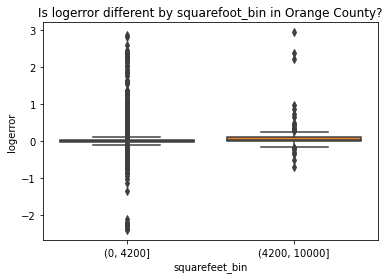

In [37]:
# New colum in dataframe and visualization

or_df['squarefeet_bin'] = pd.cut(or_df.squarefeet, [0, 4200, 10000])
sns.boxplot(or_df.squarefeet_bin, or_df.logerror)
plt.title("Is logerror different by squarefoot_bin in Orange County?")
plt.show()

In [38]:
or_df.squarefeet_bin.value_counts()

(0, 4200]        11189
(4200, 10000]      314
Name: squarefeet_bin, dtype: int64

I played around with the bins untill they had about the same number of observations, not sure if that is the right thing to do.  Visually they do not look any different but I will best with a 2 sample T-Test.

#### 2 Sample T-Test:

Hypothesis - This is no difference in logerror between bins (squareet <= 1590, squareffet > 5541) in Orange County

null_hypothesis = "Average logerror is the same across bins"   
alternative_hypothesis = "Average logerror is different between bins"   
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [48]:
small_squarefeet = or_df[or_df.squarefeet <= 14200]
large_squarefeet = or_df[or_df.squarefeet > 4200]
small_squarefeet.shape, large_squarefeet.shape

((11503, 32), (314, 32))

#### Levene Test of Variance

In [49]:
# test the equal variance 
# H0 is that the variances are equal
# Levene test (Reject Null if < 0.05)

stats.levene(small_squarefeet.logerror, large_squarefeet.logerror)

LeveneResult(statistic=15.592611064007409, pvalue=7.901682789078917e-05)

**Reject Null: Variances are NOT equal**

#### 2-Sample T-Test

In [50]:
# equal_var = False as result of levene test

stats.ttest_ind(small_squarefeet.logerror, large_squarefeet.logerror, equal_var=False)

Ttest_indResult(statistic=-2.9352206800387384, pvalue=0.003572903912758044)

#### Reject Null: Average Logerror is different between bins

**This might account for the difference in Logerror in Orange County**

In [51]:
or_df.head(1)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,squarefeet,delete_finishedsquarefeet12,delete_fullbathcnt,latitude,longitude,lotsizesquarefeet,...,taxamount,censustractandblock,logerror,tdate,heatingorsystemdesc,propertylandusedesc,county,bedroom_bin,yearbuilt_bin,squarefeet_bin
65563,14014097,2.50,4.00,8.00,2413,"2,413.00",2.00,"33,830,143.00","-118,015,726.00","4,845.00",...,"6,758.58","60,591,102,021,012.00",-0.01,2017-08-11,None,Single Family Residential,Orange,"(3, 9]","(1980, 2000]","(0, 4200]"


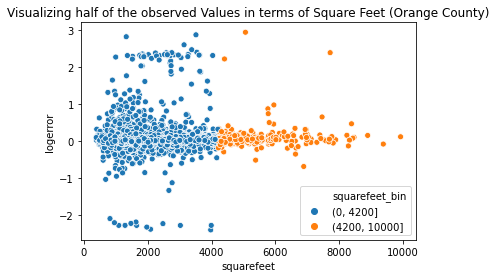

In [52]:
# Better visualization with binned data

sns.scatterplot(x='squarefeet', y='logerror',
               data=or_df, hue='squarefeet_bin')
plt.title("Visualizing half of the observed Values in terms of Square Feet (Orange County)")
plt.show()

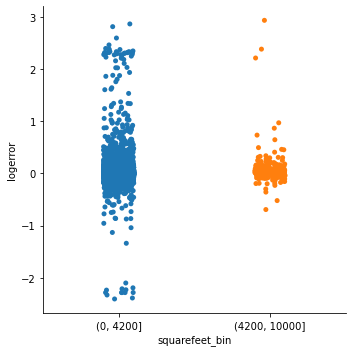

In [59]:
# Visualize error per bin
sns.catplot(x="squarefeet_bin", y="logerror", data=or_df)
plt.show()

This demonstrates he center of the observations.  Half of the houses are below 1600 square feet, and half are above.  Might want to break the data up around 4000 square feet to better understand the groups.  

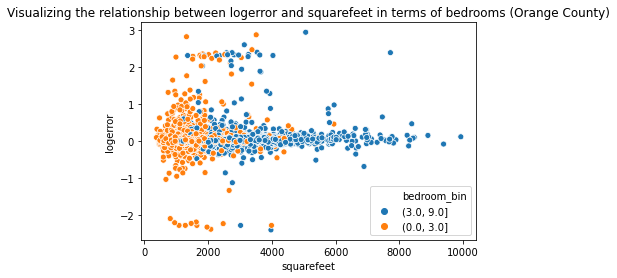

In [53]:
# How bedroomcount affects the relationship between squarefeet and logerror

sns.scatterplot(x='squarefeet', y='logerror',
               data=or_df, hue='bedroom_bin')
plt.title("Visualizing the relationship between logerror and squarefeet in terms of bedrooms (Orange County)")
plt.show()

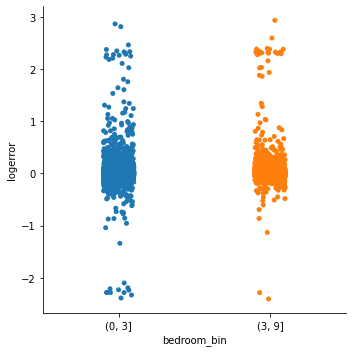

In [58]:
# Visualize error per bin
sns.catplot(x="bedroom_bin", y="logerror", data=or_df)
plt.show()

Majority of error is associated with homes hunder 40,000 square feet with 0-3 Bedrooms in Orange County

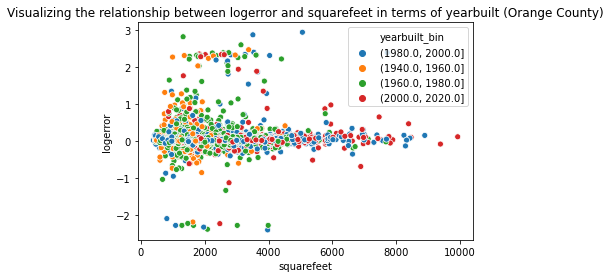

In [54]:
# How Yearbuilt affects the relationship between squarefeet and logerror

sns.scatterplot(x='squarefeet', y='logerror',
               data=or_df, hue='yearbuilt_bin')
plt.title("Visualizing the relationship between logerror and squarefeet in terms of yearbuilt (Orange County)")
plt.show()

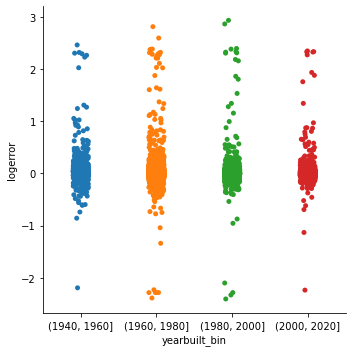

In [57]:
# Visualize error per bin
sns.catplot(x="yearbuilt_bin", y="logerror", data=or_df)
plt.show()

Most logerror appears to be associated in homes built between 1960 and 1980

***

**Bonus:**

***Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.***

In [46]:
or_df['zip'] = or_df['zip'].astype('int')

In [47]:
or_df.zip.value_counts()

96987    402
96974    341
96993    322
96962    287
96996    281
96995    263
97078    259
96964    252
96989    240
96998    239
96954    226
96966    216
96186    205
97041    200
96978    200
97068    192
96985    190
96963    184
96982    177
96983    177
97026    174
97023    173
96990    168
97067    168
96185    167
97008    167
96180    163
96961    162
97016    160
97047    157
97065    156
96958    156
96971    156
97018    155
96967    153
97004    152
96959    152
97035    150
96969    147
97005    147
97027    141
96965    135
96981    132
97043    132
96947    131
97024    129
96940    120
97007    118
96941    109
96957    109
97079    108
96952     98
96948     98
97006     94
96939     93
96975     92
97039     92
97020     90
96218     83
97063     81
96203     78
97001     75
97021     74
97003     74
96225     74
97050     70
97052     68
96181     67
97066     67
97051     66
96946     64
97048     60
97025     60
97040     59
96943     57
96956     41
97064     40